In [1]:
import os 
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm
import function_plot as f_plt

In [2]:
mock_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.1eq_bc03MILES_ChFall/mock_ER_001/'
models_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.1eq_bc03MILES_ChFall/'
phpars_to_fit=['mstar','mstar_form','agewr','agelgwr','agewm','agelgwm','agewmf','agelgwmf','zstarwr','zstarwm','zstarwmf','zstarlgwmf','zstarlgwr','zstarlgwm','Ag','Ai','mtoli','age10','age50','age90','dage_10_90', 'dage_25_75', 'dage_50_90', 'dage_10_50']
n_par=np.size(phpars_to_fit)

In [3]:
file_models=models_dir+'sandage_varZ_v4.1eq_spec_dcomb_001_physpar_wagef.fits'
file_idx_pert=mock_dir+'sandage_varZ_v4.1eq_spec_dcomb_perterr_001.fits'
file_mock_age10=mock_dir+'mock_file_age10.fits'
file_mock_agemwf=mock_dir+'mock_file_agewmf.fits'
file_idx=models_dir+'sandage_varZ_v4.1eq_spec_dcomb090n_idx_001.fits'
file_mock_age90=mock_dir+'mock_file_age90.fits'
file_mock_age50=mock_dir+'mock_file_age50.fits'
file_mock_dage1090=mock_dir+'mock_file_dage_10_90.fits'
file_mock_dage2575=mock_dir+'mock_file_dage_25_75.fits'
file_mock_dage5090=mock_dir+'mock_file_dage_50_90.fits'
file_mock_dage1050=mock_dir+'mock_file_dage_10_50.fits'


hdul_model=fits.open(file_models)
hdul_idx_pert=fits.open(file_idx_pert)
hdul_age10=fits.open(file_mock_age10)
hdul_age90=fits.open(file_mock_age90)
hdul_age50=fits.open(file_mock_age50)
hdul_dage1090=fits.open(file_mock_dage1090)
hdul_dage2575=fits.open(file_mock_dage2575)
hdul_dage5090=fits.open(file_mock_dage5090)
hdul_dage1050=fits.open(file_mock_dage1050)

hdul_agemwf=fits.open(file_mock_agemwf)
hdul_idx=fits.open(file_idx)
n_mock=np.size(hdul_age10[1].data)
#hdul.close()

In [4]:
mstar=hdul_model[1].data['m_pres'][0:n_mock]
mstar_form=hdul_model[1].data['m_form'][0:n_mock]
#agewr=hdul_model[1].data[''][0:n_mock]
#agelgwr=hdul_model[1].data[''][0:n_mock]
#agewm=hdul_model[1].data['MPRESW_AGE'][0:n_mock]
agelgwm=hdul_model[1].data['MPRESW_LOGAGE'][0:n_mock]
agewmf=hdul_model[1].data['MFORMW_AGE'][0:n_mock]
agelgwmf=hdul_model[1].data['MFORMW_LOGAGE'][0:n_mock]
#zstarwr=hdul_model[1].data[''][0:n_mock]
#zstarwm=hdul_model[1].data[''][0:n_mock]
#zstarwmf=hdul_model[1].data[''][0:n_mock]
#zstarlgwmf=hdul_model[1].data[''][0:n_mock]
#zstarlgwr=hdul_model[1].data[''][0:n_mock]
#zstarlgwm=hdul_model[1].data[''][0:n_mock]
#Ag=hdul_model[1].data[''][0:n_mock]
#Ai=hdul_model[1].data[''][0:n_mock]
#mtoli=hdul_model[1].data[''][0:n_mock]
age10=hdul_model[1].data['age10'][0:n_mock]
age50=hdul_model[1].data['age50'][0:n_mock]
age90=hdul_model[1].data['age90'][0:n_mock]
age25=hdul_model[1].data['age25'][0:n_mock]
age75=hdul_model[1].data['age75'][0:n_mock]

hdhg=hdul_idx[1].data['HdHg'][...,4] #200 km/s ??????
D4000n=hdul_idx[1].data['D4000n'][...,4] #200 km/s ???

In [5]:
age10_mock=hdul_age10[1].data['PARAM_MEDIAN']
age10_err=(hdul_age10[1].data['PARAM_P84']-hdul_age10[1].data['PARAM_P16'])/2.0

In [6]:
age90_mock=hdul_age90[1].data['PARAM_MEDIAN']
age90_err=(hdul_age90[1].data['PARAM_P84']-hdul_age90[1].data['PARAM_P16'])/2.0

In [7]:
age50_mock=hdul_age50[1].data['PARAM_MEDIAN']
age50_err=(hdul_age50[1].data['PARAM_P84']-hdul_age50[1].data['PARAM_P16'])/2.0

In [8]:
dage1090_mock=hdul_dage1090[1].data['PARAM_MEDIAN']
dage1090_err=(np.log10(hdul_dage1090[1].data['PARAM_P84'])-np.log10(hdul_dage1090[1].data['PARAM_P16']))/2.0

In [9]:
dage2575_mock=hdul_dage2575[1].data['PARAM_MEDIAN']
dage2575_err=(np.log10(hdul_dage2575[1].data['PARAM_P84'])-np.log10(hdul_dage2575[1].data['PARAM_P16']))/2.0
dage5090_mock=hdul_dage5090[1].data['PARAM_MEDIAN']
dage5090_err=(np.log10(hdul_dage5090[1].data['PARAM_P84'])-np.log10(hdul_dage5090[1].data['PARAM_P16']))/2.0
dage1050_mock=hdul_dage1050[1].data['PARAM_MEDIAN']
dage1050_err=(np.log10(hdul_dage1050[1].data['PARAM_P84'])-np.log10(hdul_dage1050[1].data['PARAM_P16']))/2.0

<ipython-input-9-0e7f4cd29c4b>:2: RuntimeWarning: divide by zero encountered in log10
  dage2575_err=(np.log10(hdul_dage2575[1].data['PARAM_P84'])-np.log10(hdul_dage2575[1].data['PARAM_P16']))/2.0
<ipython-input-9-0e7f4cd29c4b>:4: RuntimeWarning: divide by zero encountered in log10
  dage5090_err=(np.log10(hdul_dage5090[1].data['PARAM_P84'])-np.log10(hdul_dage5090[1].data['PARAM_P16']))/2.0
<ipython-input-9-0e7f4cd29c4b>:4: RuntimeWarning: invalid value encountered in subtract
  dage5090_err=(np.log10(hdul_dage5090[1].data['PARAM_P84'])-np.log10(hdul_dage5090[1].data['PARAM_P16']))/2.0
<ipython-input-9-0e7f4cd29c4b>:6: RuntimeWarning: divide by zero encountered in log10
  dage1050_err=(np.log10(hdul_dage1050[1].data['PARAM_P84'])-np.log10(hdul_dage1050[1].data['PARAM_P16']))/2.0


total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3981: RuntimeWarning: invalid value encountered in add
  r = add(x1, x2)


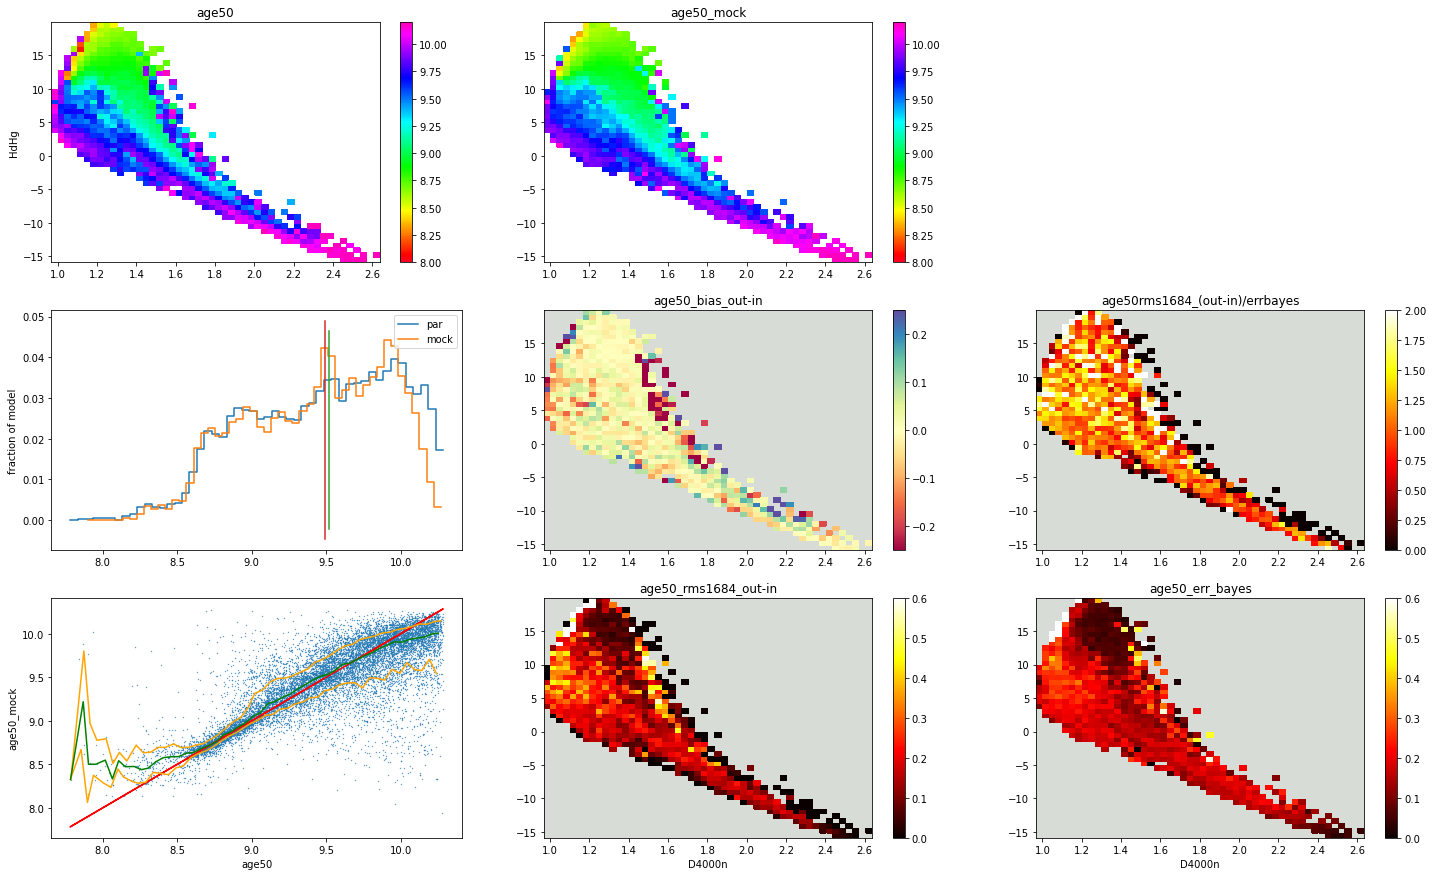

In [10]:
f_50=f_plt.density_map_5p(D4000n, hdhg, np.log10(age50), age50_mock, age50_err,par_name='age50', x_label='D4000n', y_label='HdHg', vmin=[8.0, -0.25, 0.0, 0.0,0.0], vmax=[10.2, 0.25, 2.0,0.6,0.6], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3981: RuntimeWarning: invalid value encountered in add
  r = add(x1, x2)


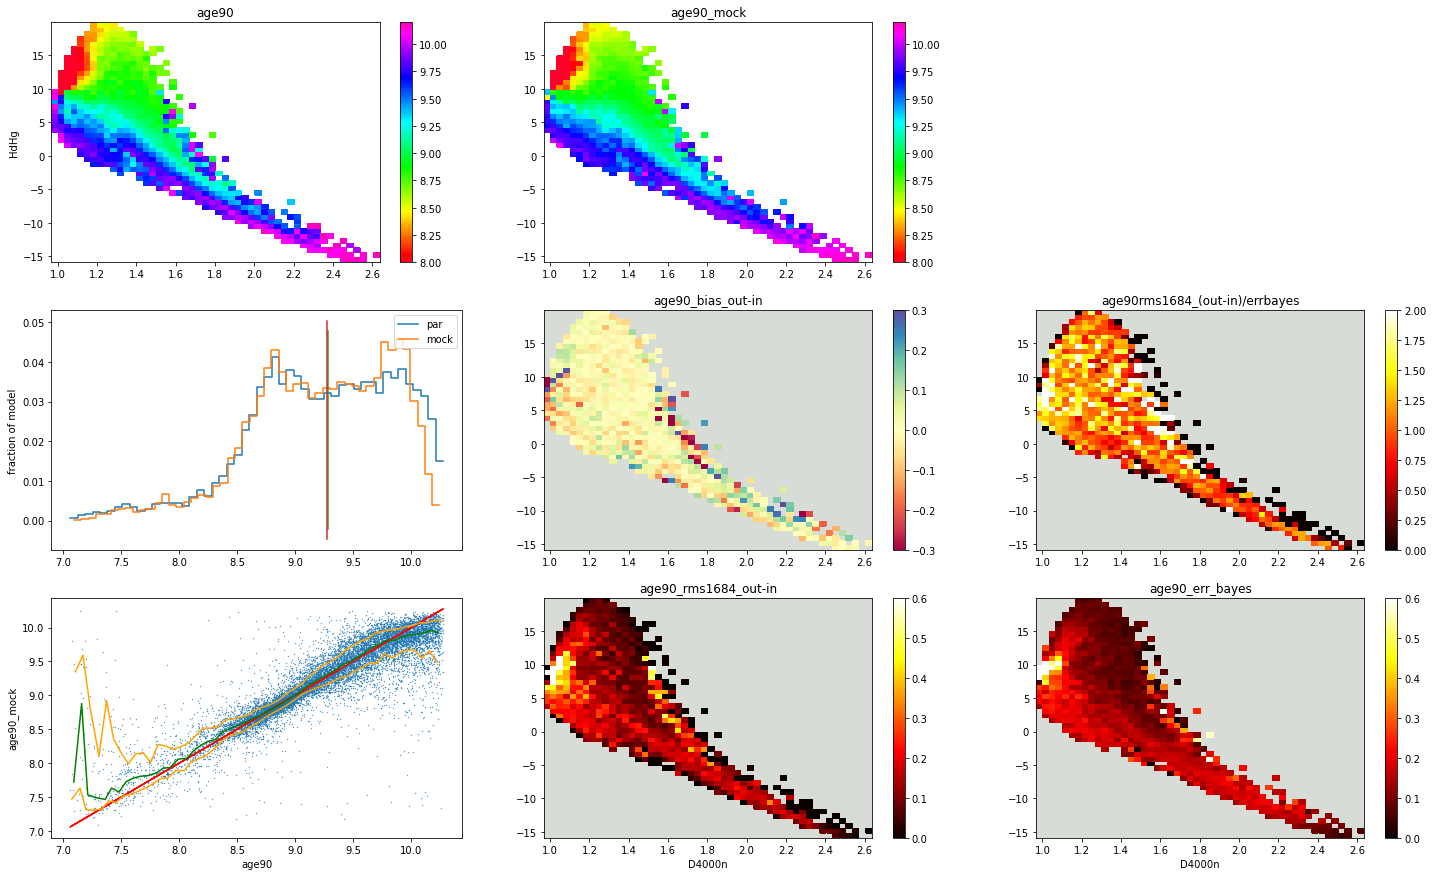

In [11]:
f_90=f_plt.density_map_5p(D4000n, hdhg, np.log10(age90), age90_mock, age90_err,par_name='age90', x_label='D4000n', y_label='HdHg', vmin=[8.0, -0.3, 0.0, 0.0,0.0], vmax=[10.2, 0.3, 2.0,0.6,0.6], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3981: RuntimeWarning: invalid value encountered in add
  r = add(x1, x2)


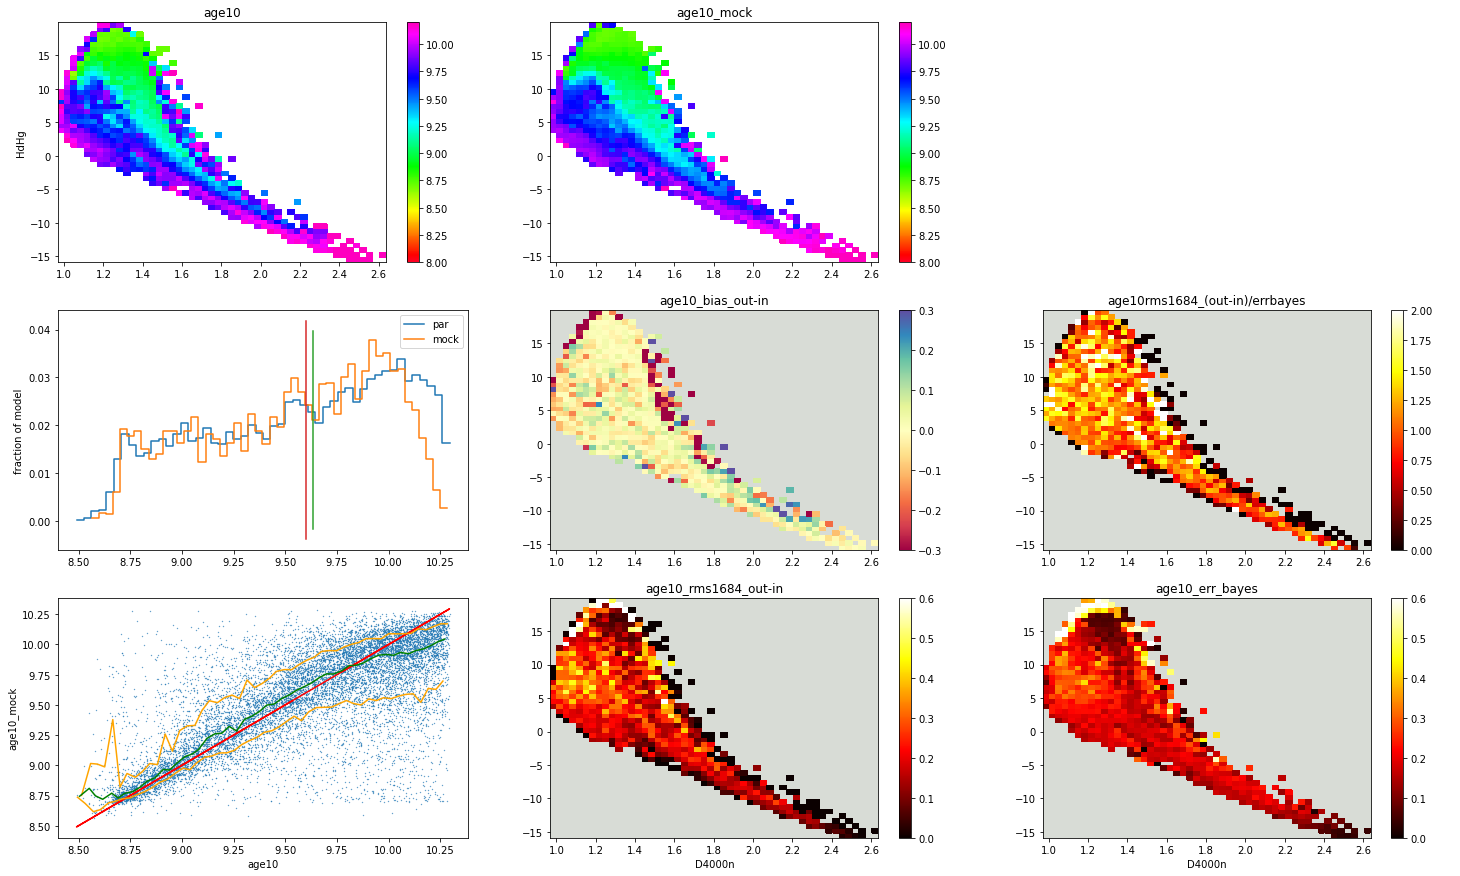

In [12]:
f_10=f_plt.density_map_5p(D4000n, hdhg, np.log10(age10), age10_mock, age10_err,par_name='age10', x_label='D4000n', y_label='HdHg', vmin=[8.0, -0.3, 0.0, 0.0,0.0], vmax=[10.2, 0.3, 2.0,0.6,0.6], figsize=(25,15))

In [13]:
#f_50.savefig('/home/edoardo/Desktop/TESI/figure/mock_age50.png')

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


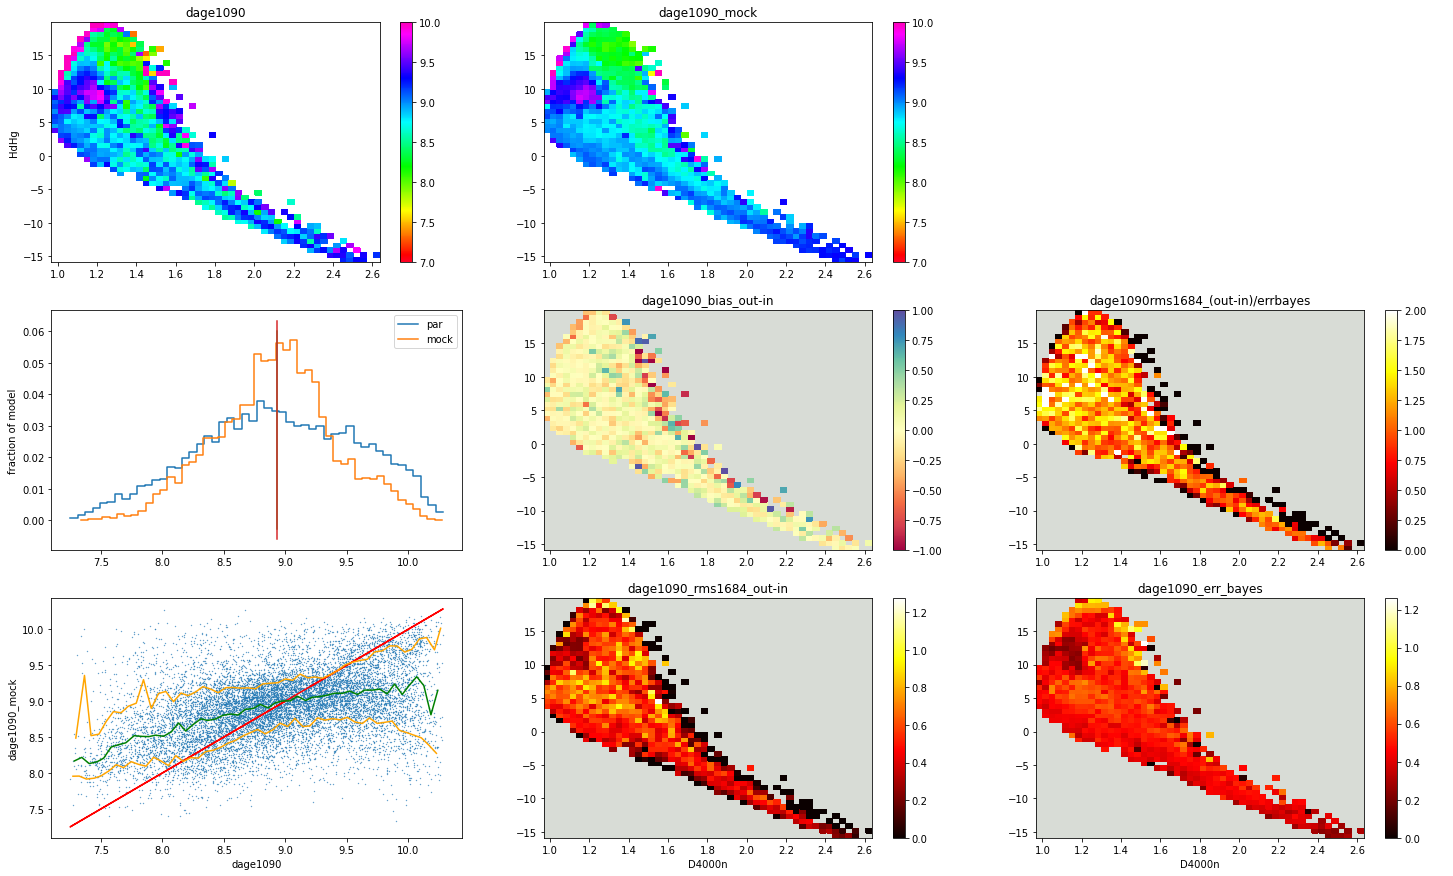

In [14]:
f_1090=f_plt.density_map_5p(D4000n, hdhg, np.log10(age10-age90), np.log10(dage1090_mock), (dage1090_err),par_name='dage1090', x_label='D4000n', y_label='HdHg', vmin=[7,-1, 0.0, None,None], vmax=[10,1, 2, None,None], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


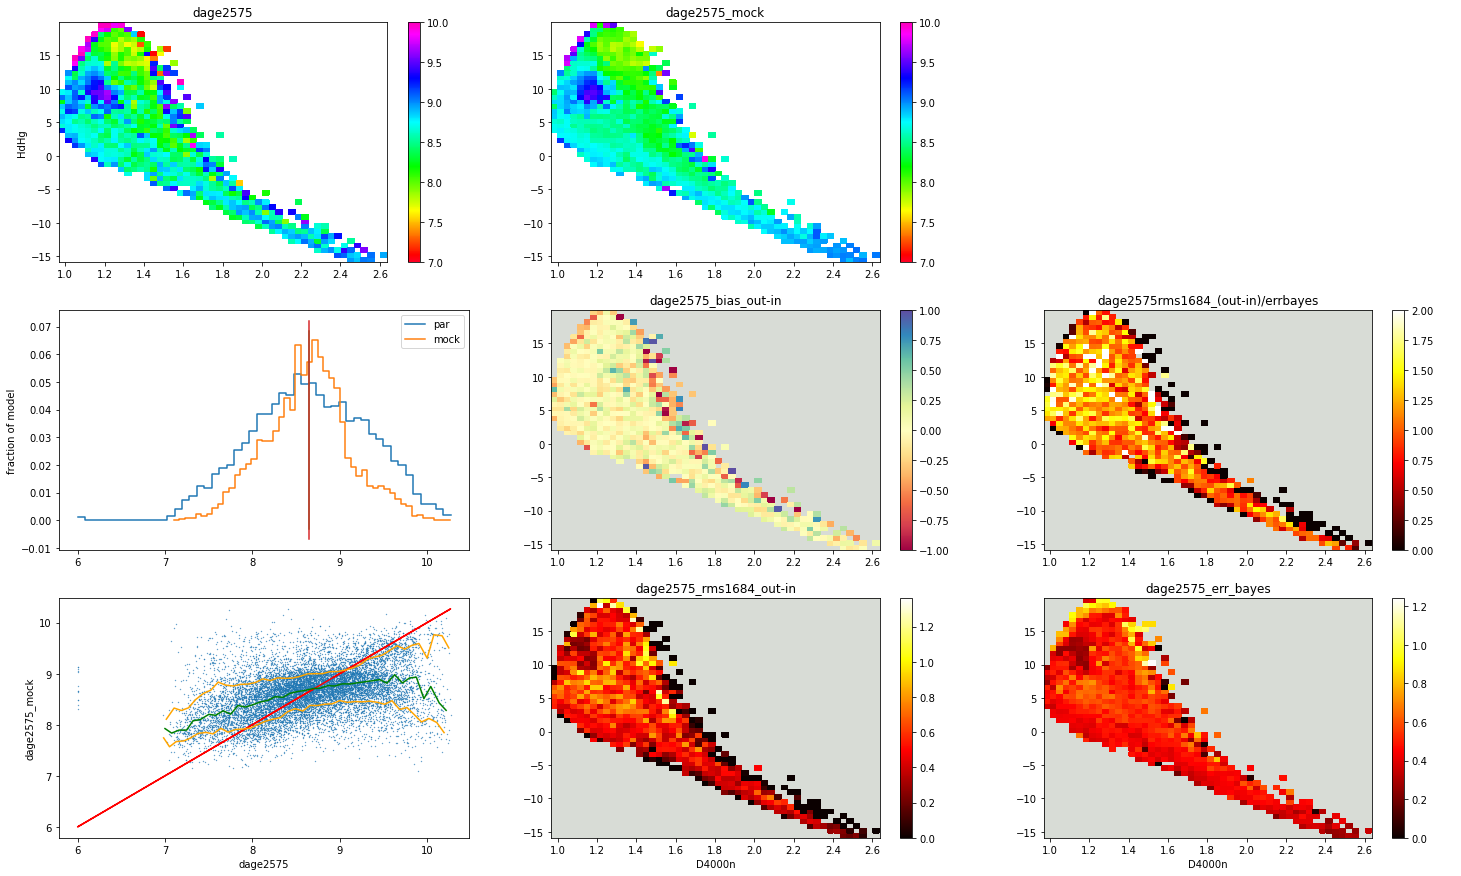

In [15]:
f_2575=f_plt.density_map_5p(D4000n, hdhg, np.log10(age25-age75+10**6), np.log10(dage2575_mock+10**6), (dage2575_err),par_name='dage2575', x_label='D4000n', y_label='HdHg', vmin=[7,-1, 0.0, None,None], vmax=[10,1, 2, None,None], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


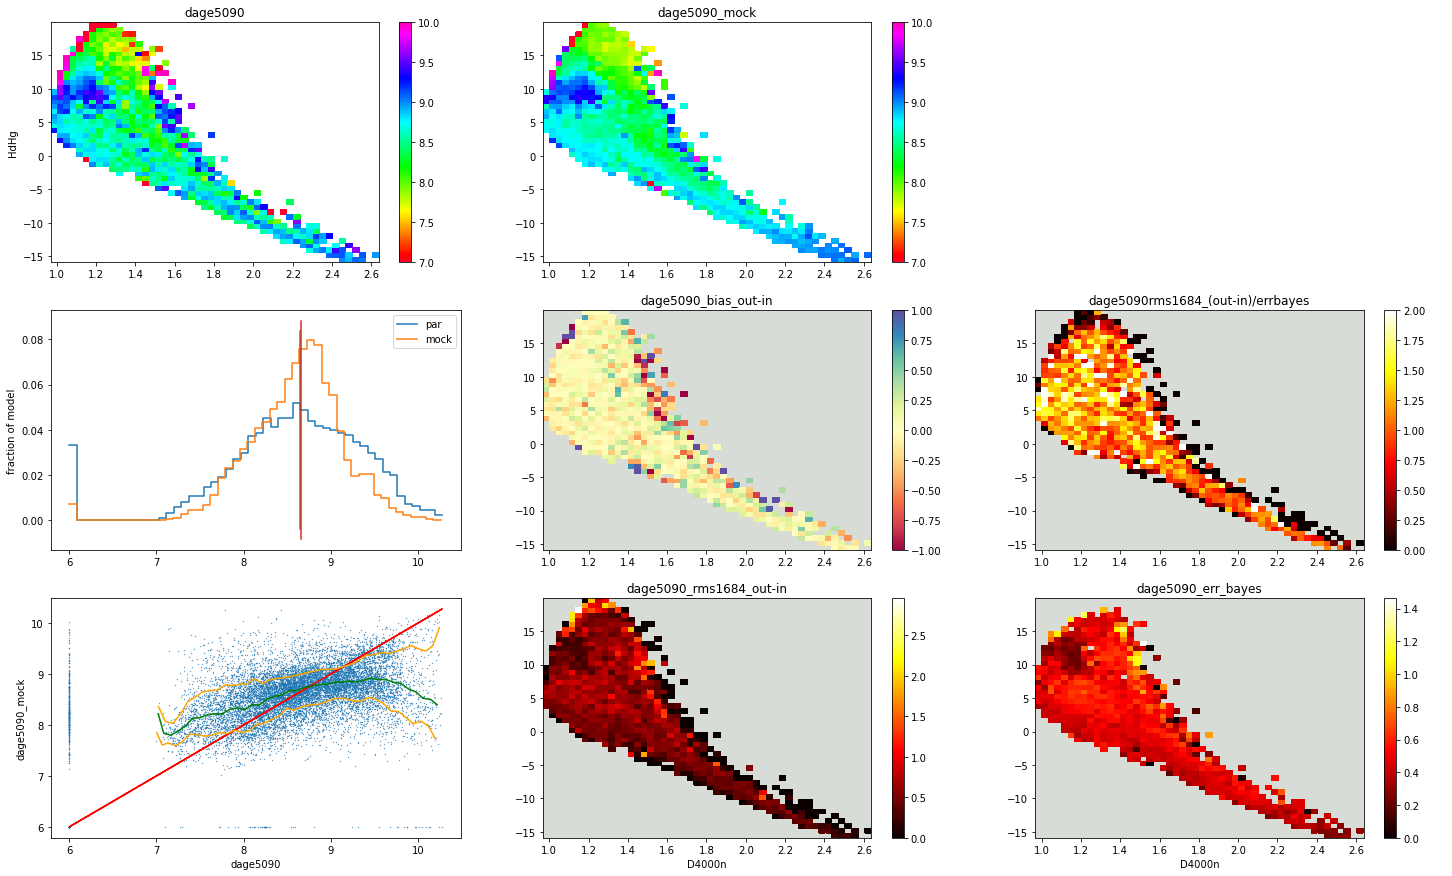

In [16]:
f_5090=f_plt.density_map_5p(D4000n, hdhg, np.log10(age50-age90+10**6), np.log10(dage5090_mock+10**6), (dage5090_err),par_name='dage5090', x_label='D4000n', y_label='HdHg', vmin=[7,-1, 0.0, None,None], vmax=[10,1, 2, None,None], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


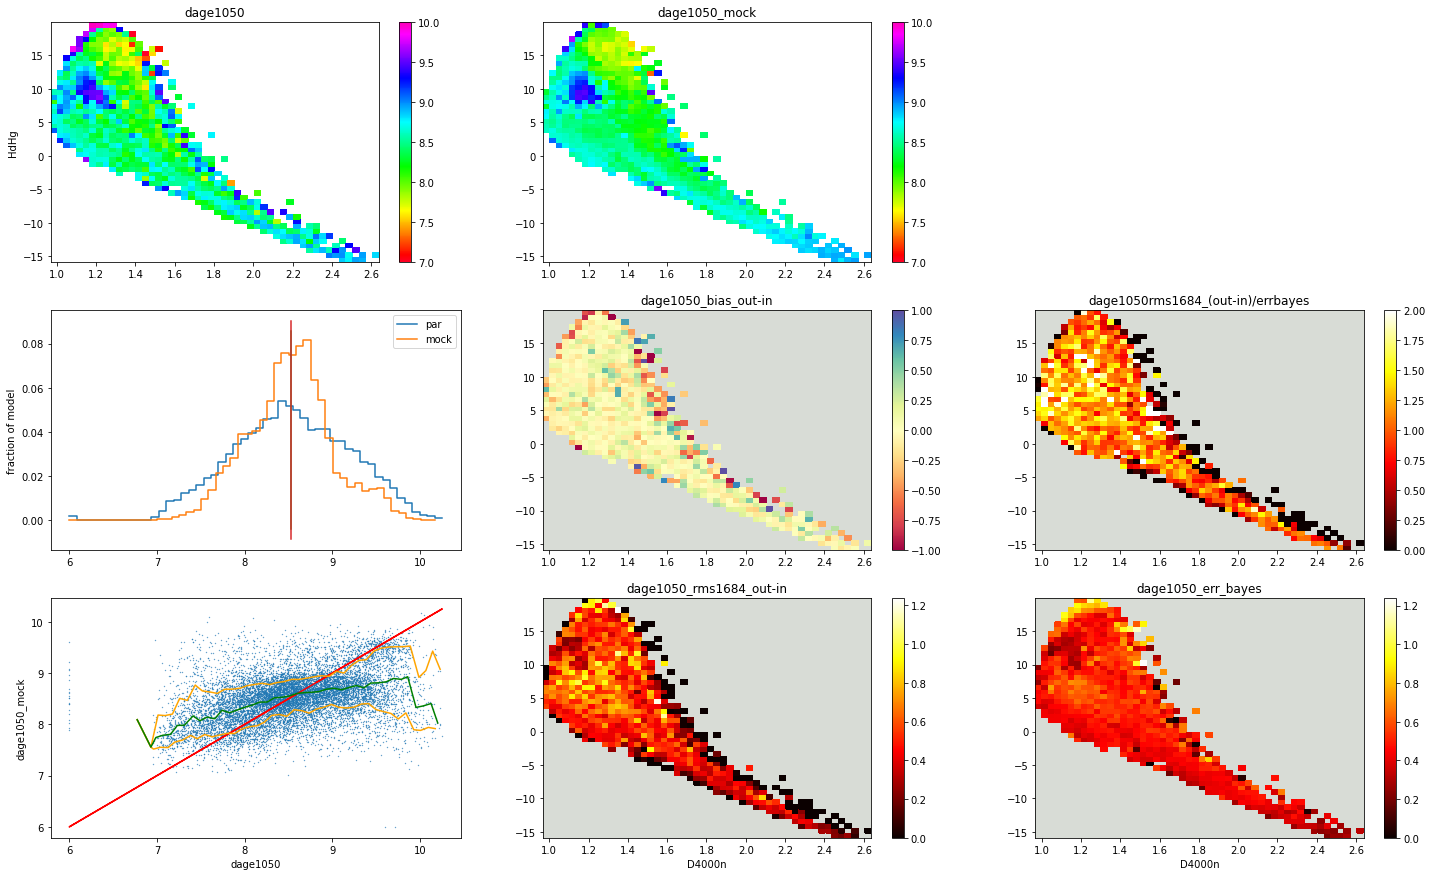

In [17]:
f_1050=f_plt.density_map_5p(D4000n, hdhg, np.log10(age10-age50+10**6), np.log10(dage1050_mock+10**6), (dage1050_err),par_name='dage1050', x_label='D4000n', y_label='HdHg', vmin=[7,-1, 0.0, None,None], vmax=[10,1, 2, None,None], figsize=(25,15))

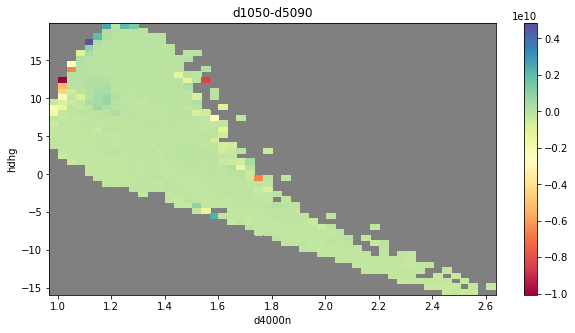

In [18]:
f_diff=f_plt.diff_density_map(D4000n, hdhg, dage1050_mock, dage5090_mock,statistic='median',name1='d1050',name2='d5090',xlabel='d4000n',ylabel='hdhg',figsize=(10,5),vmin=None,vmax=None )

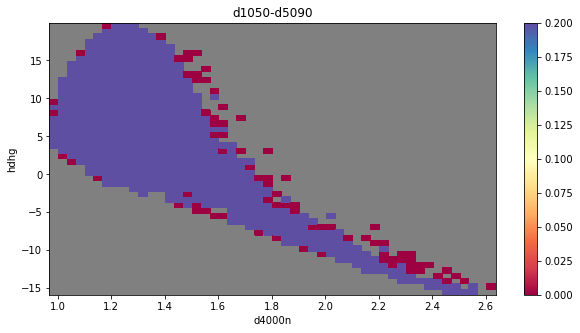

In [19]:
f_diff=f_plt.diff_density_map(D4000n, hdhg, dage1050_mock, dage5090_mock,statistic=f_plt.rms_1684,name1='d1050',name2='d5090',xlabel='d4000n',ylabel='hdhg',figsize=(10,5),vmin=0.0,vmax=0.2 )

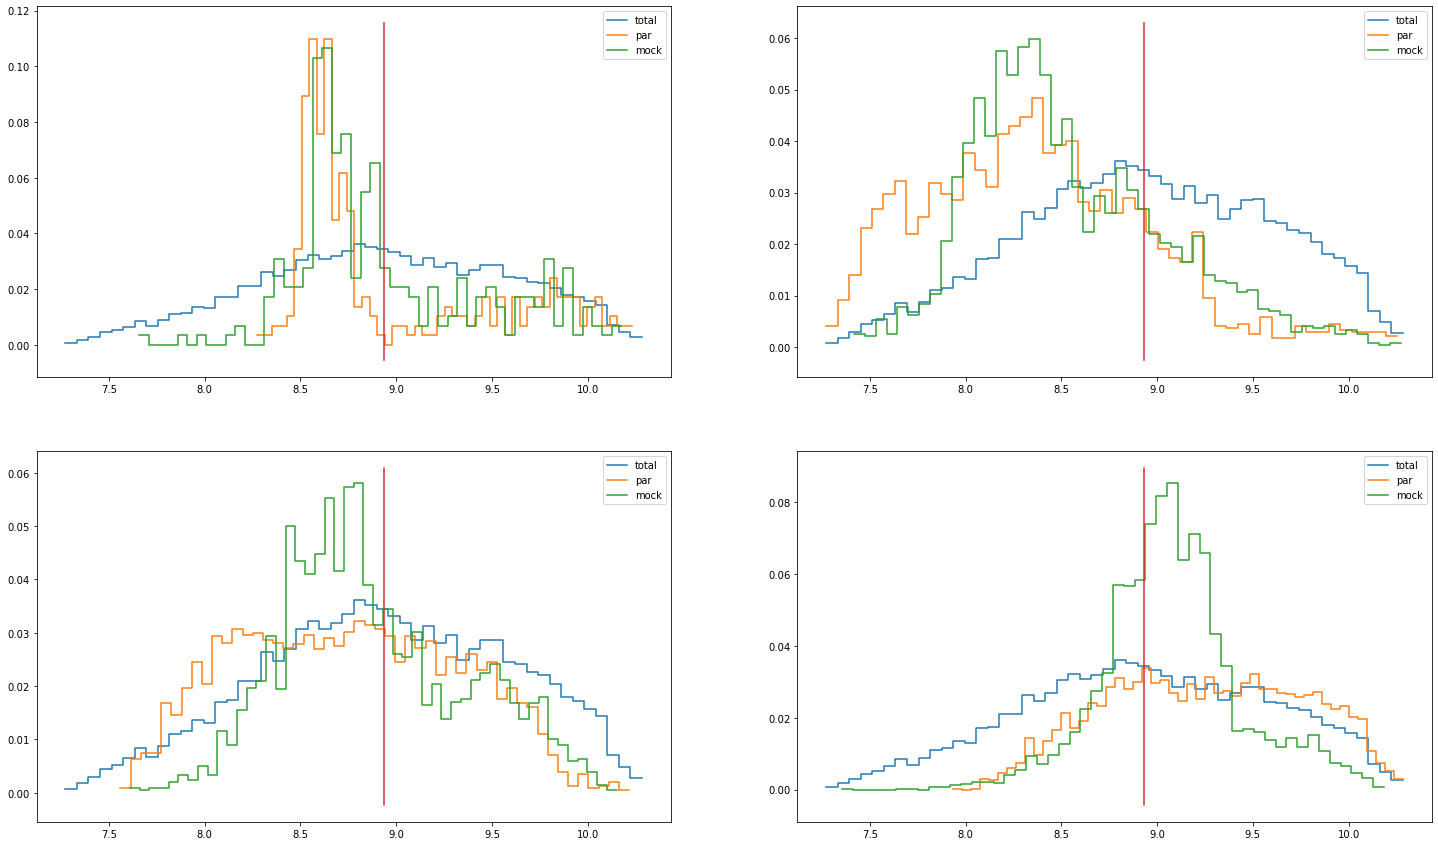

In [45]:
f_prior=f_plt.prior_comp(np.log10(age50), np.log10(age10-age90+10**6),np.log10(dage1090_mock+10**6), limits=[8.5,9.0,9.5] )

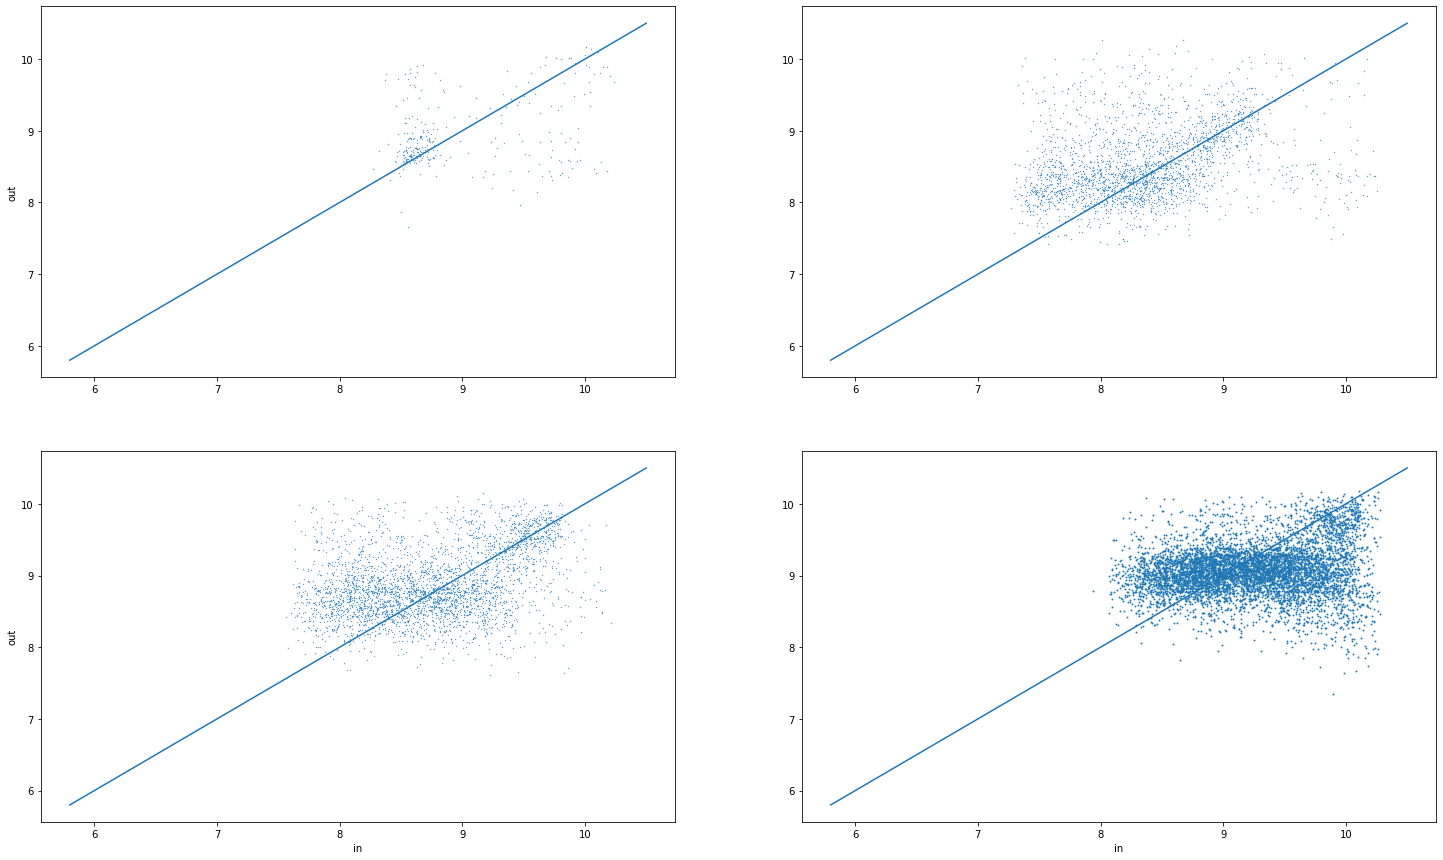

In [46]:
f_scatter=f_plt.scatter_comp(np.log10(age50), np.log10(age10-age90+10**6),np.log10(dage1090_mock+10**6), limits=[8.5,9.0,9.5] )

In [47]:
_i=np.argwhere(np.logical_and(np.logical_and((np.log10(age50)>9.5),(np.log10(age10-age90+10**6)>9.5) ), (np.log10(dage1090_mock+10**6)>9.5)) )
_idx=_i.reshape(np.shape(_i)[0])         

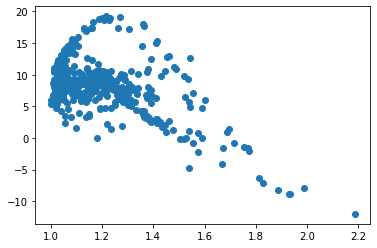

In [48]:
plt.scatter(D4000n[_idx], hdhg[_idx])

In [49]:
i=np.argwhere(np.logical_and(np.logical_and(np.logical_and((np.log10(age50)<9.0),(np.log10(age10-age90+10**6)>8.7) ), (np.log10(dage1090_mock+10**6)>8.7)), (np.log10(age50)>8.5)))
idx=i.reshape(np.shape(i)[0])         

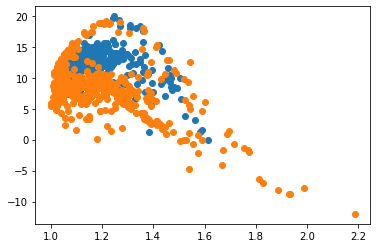

In [50]:
plt.scatter(D4000n[idx], hdhg[idx])
plt.scatter(D4000n[_idx], hdhg[_idx])

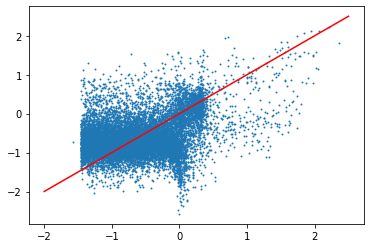

In [57]:
plt.scatter(np.log10(age10-age90)-np.log10(age50), np.log10(dage1090_mock)-np.log10(age50), s=0.9)
plt.plot([-2.0,2.5], [-2.0,2.5], color='red')

In [58]:
istpar_tot=np.histogram(np.log10(age10-age90)-np.log10(age50),bins=50)
frac_partot=istpar_tot[0]/np.size((np.log10(age10-age90)-np.log10(age50)))
frac_partot=np.append(frac_partot[0],frac_partot)

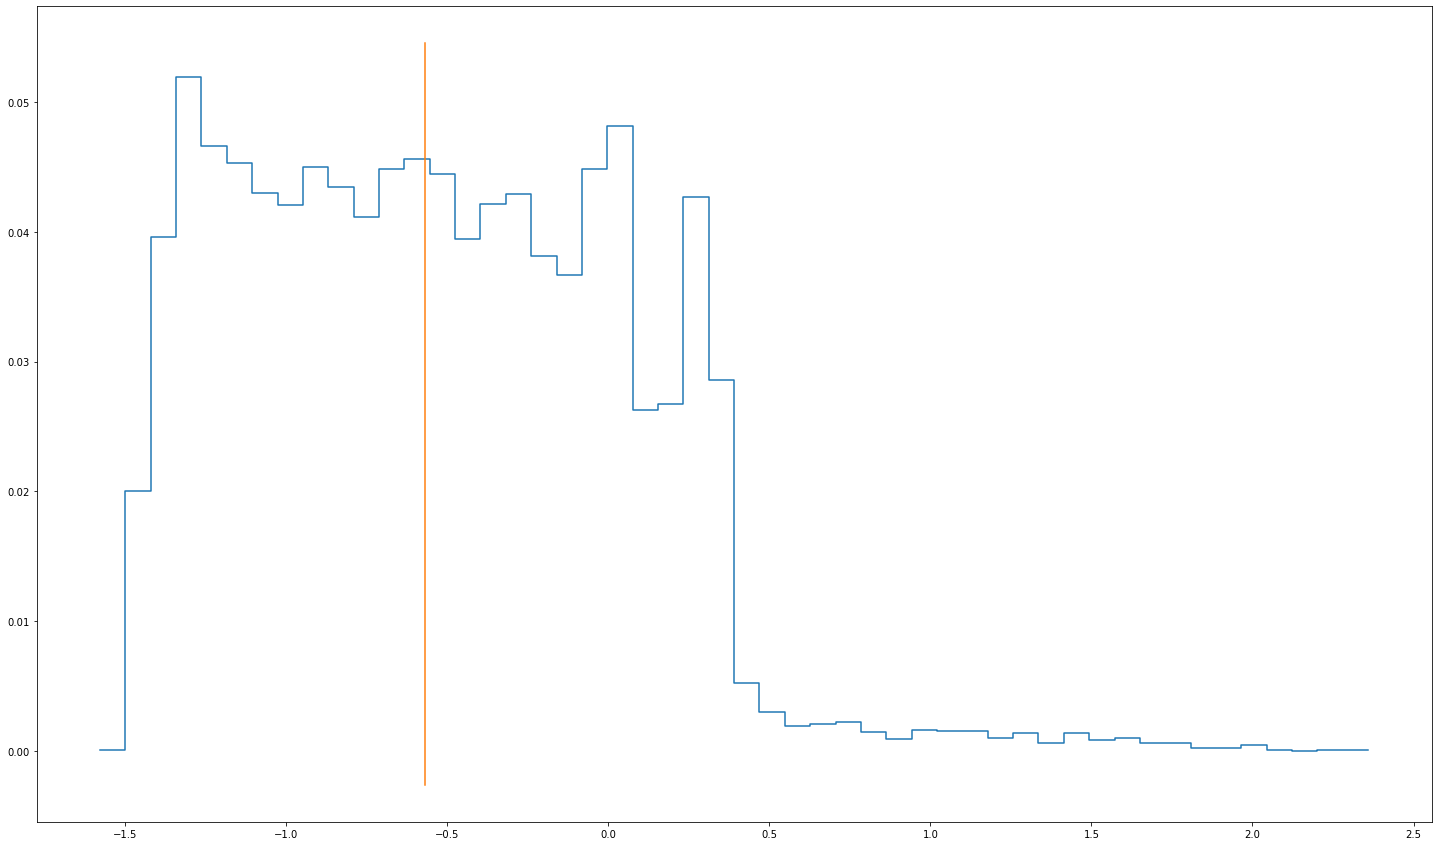

In [64]:
fig, axs=plt.subplots(figsize=(25,15))
axs.step(istpar_tot[1],frac_partot)
median_d1090_50=np.median(np.log10(age10-age90)-np.log10(age50))
axs.plot([median_d1090_50, median_d1090_50], axs.get_ylim())